>


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Food classification
    </h1>
</div>


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    TABLE OF CONTENTS
</div>

 
<div style="background-color: #ffa500; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">
        1. LIBRARY IMPORTS<br>
        2. LOAD DATA<br>
        3. Handling missing and duplicated data<br>
        4. Statistical Summary<br>
        5. EDA & Data visualization<br>
        6. Encoding<br>
        7. Feature selection<br>
        8. Feature Scaling<br>
        9. Splitting data<br>
        10. Training and evaluation of model<br>
        11. Model comparison<br>
        12. Conclusion
    </h1>
</div>
   

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [2]:
df = pd.read_csv(r"/kaggle/input/online-food-dataset/onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing Duplicated data
</div>

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

<!-- # Fill missing processor_type with 'unknown' -->

# Drop the duplicated data

In [5]:
df.duplicated().sum()

103

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(285, 13)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [9]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Age,285.000000,24.677193,3.040977,18.000000,23.000000,24.000000,26.000000,33.000000
Family size,285.000000,3.270175,1.361178,1.000000,2.000000,3.000000,4.000000,6.000000
latitude,285.000000,12.973429,0.043964,12.865200,12.943800,12.977000,12.998000,13.102000
longitude,285.000000,77.597593,0.053557,77.484200,77.563500,77.587700,77.622700,77.758200
Pin code,285.000000,560037.280702,30.738306,560001.000000,560010.000000,560028.000000,560066.000000,560109.000000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA & Data visualization
</div>

## Pairwise correlation heatmap

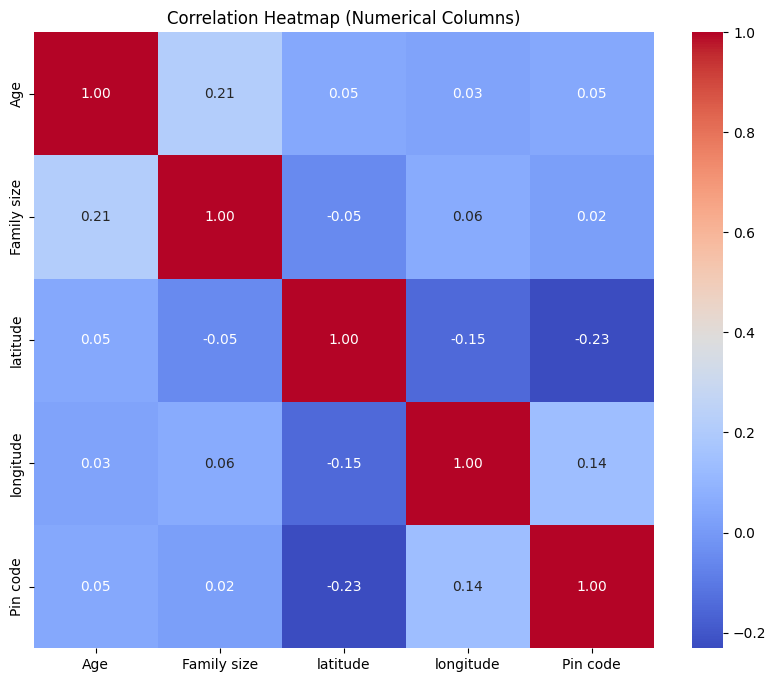

In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

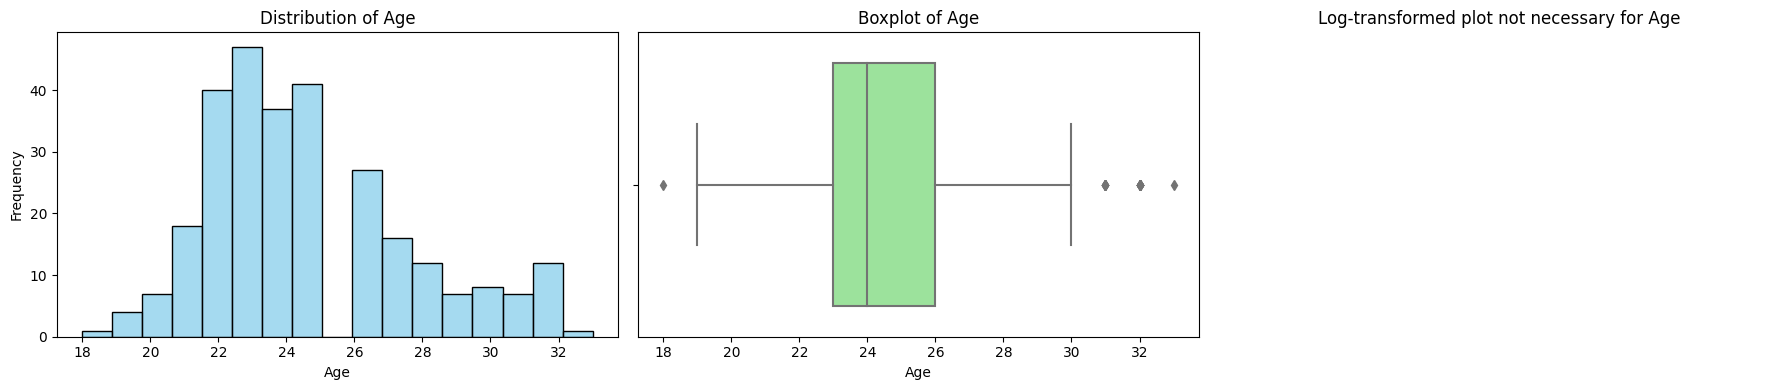

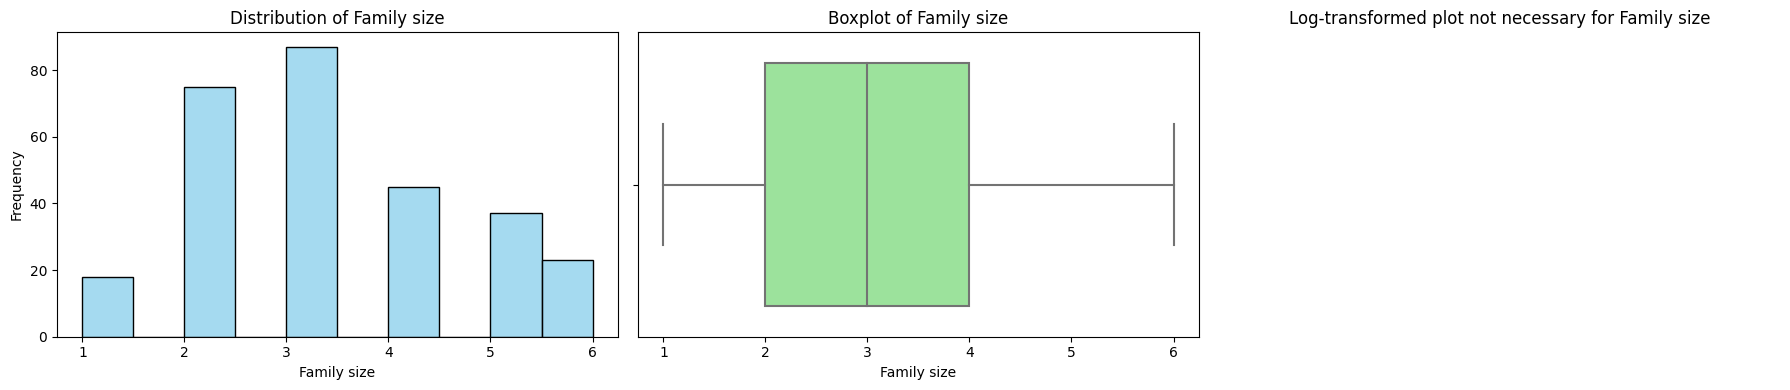

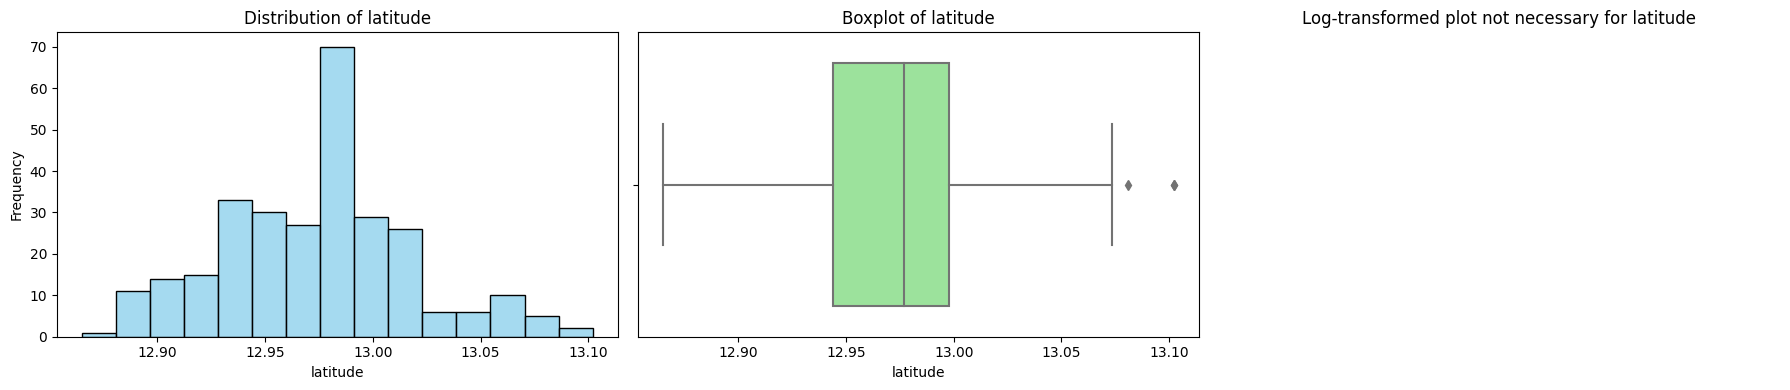

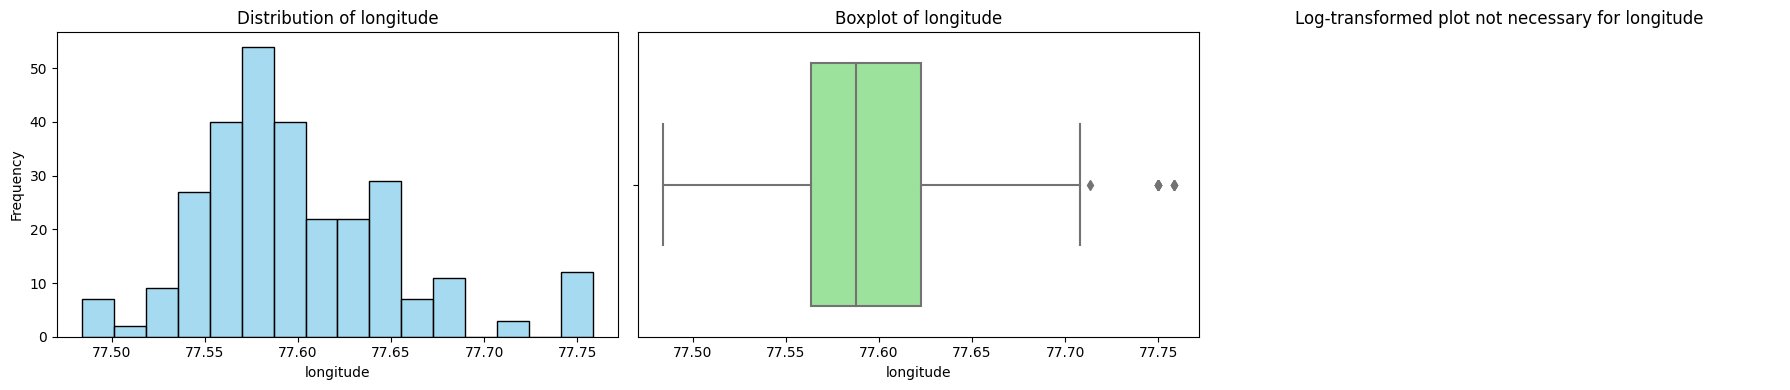

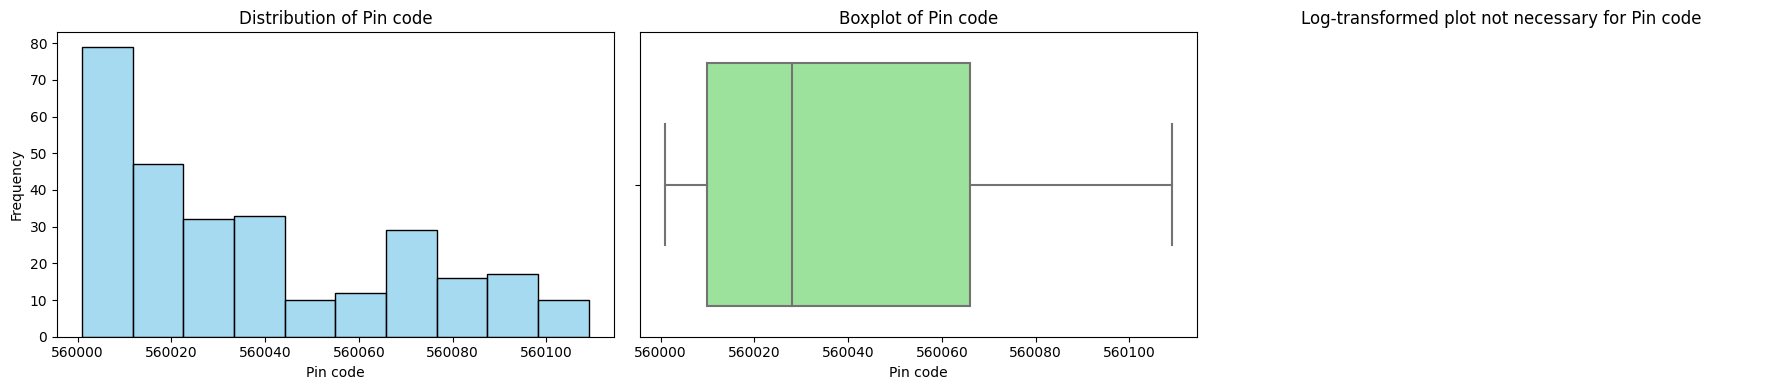

In [11]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

## scatter and pair plots

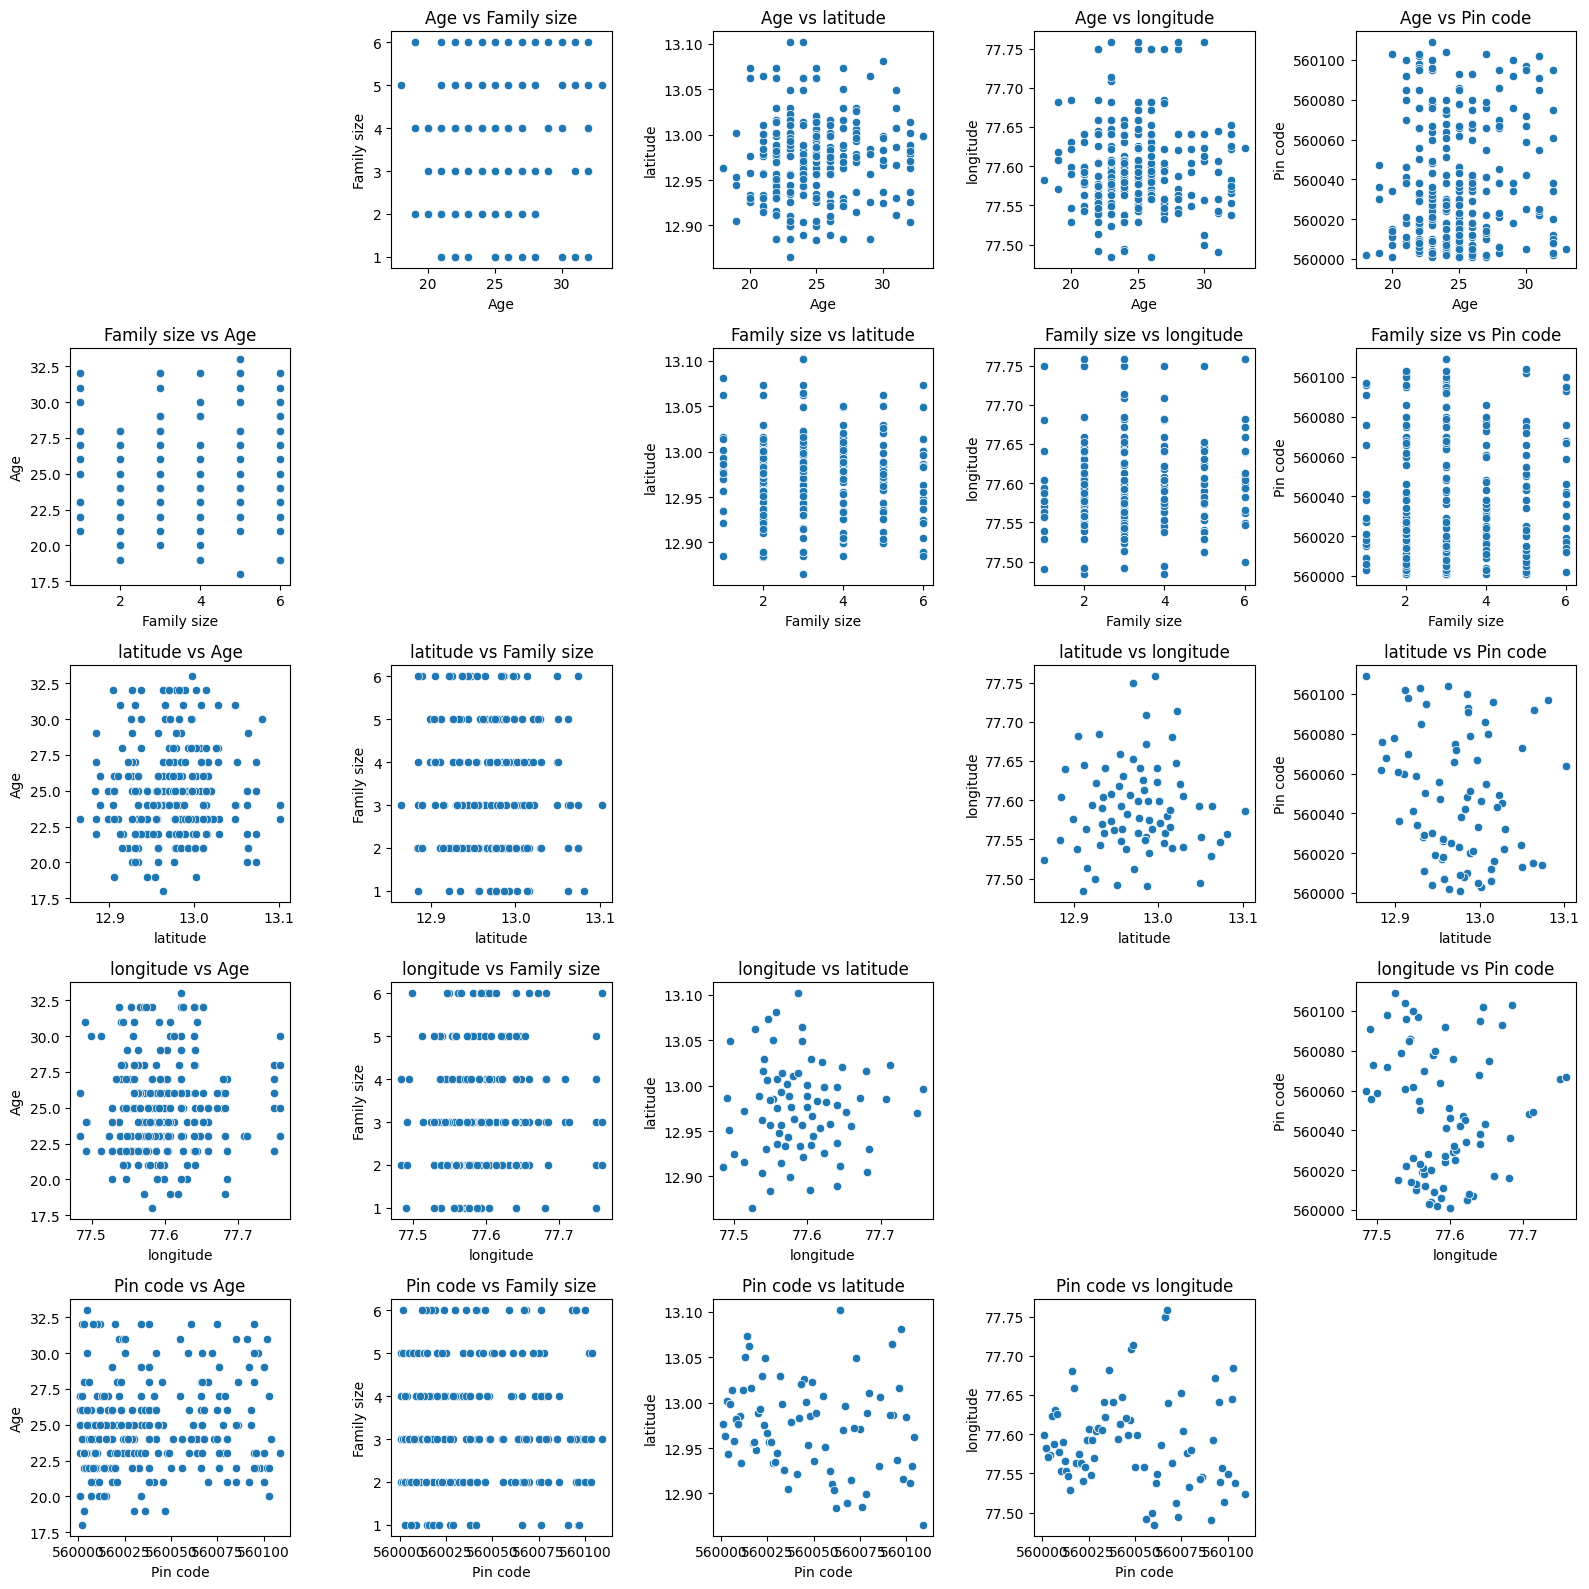

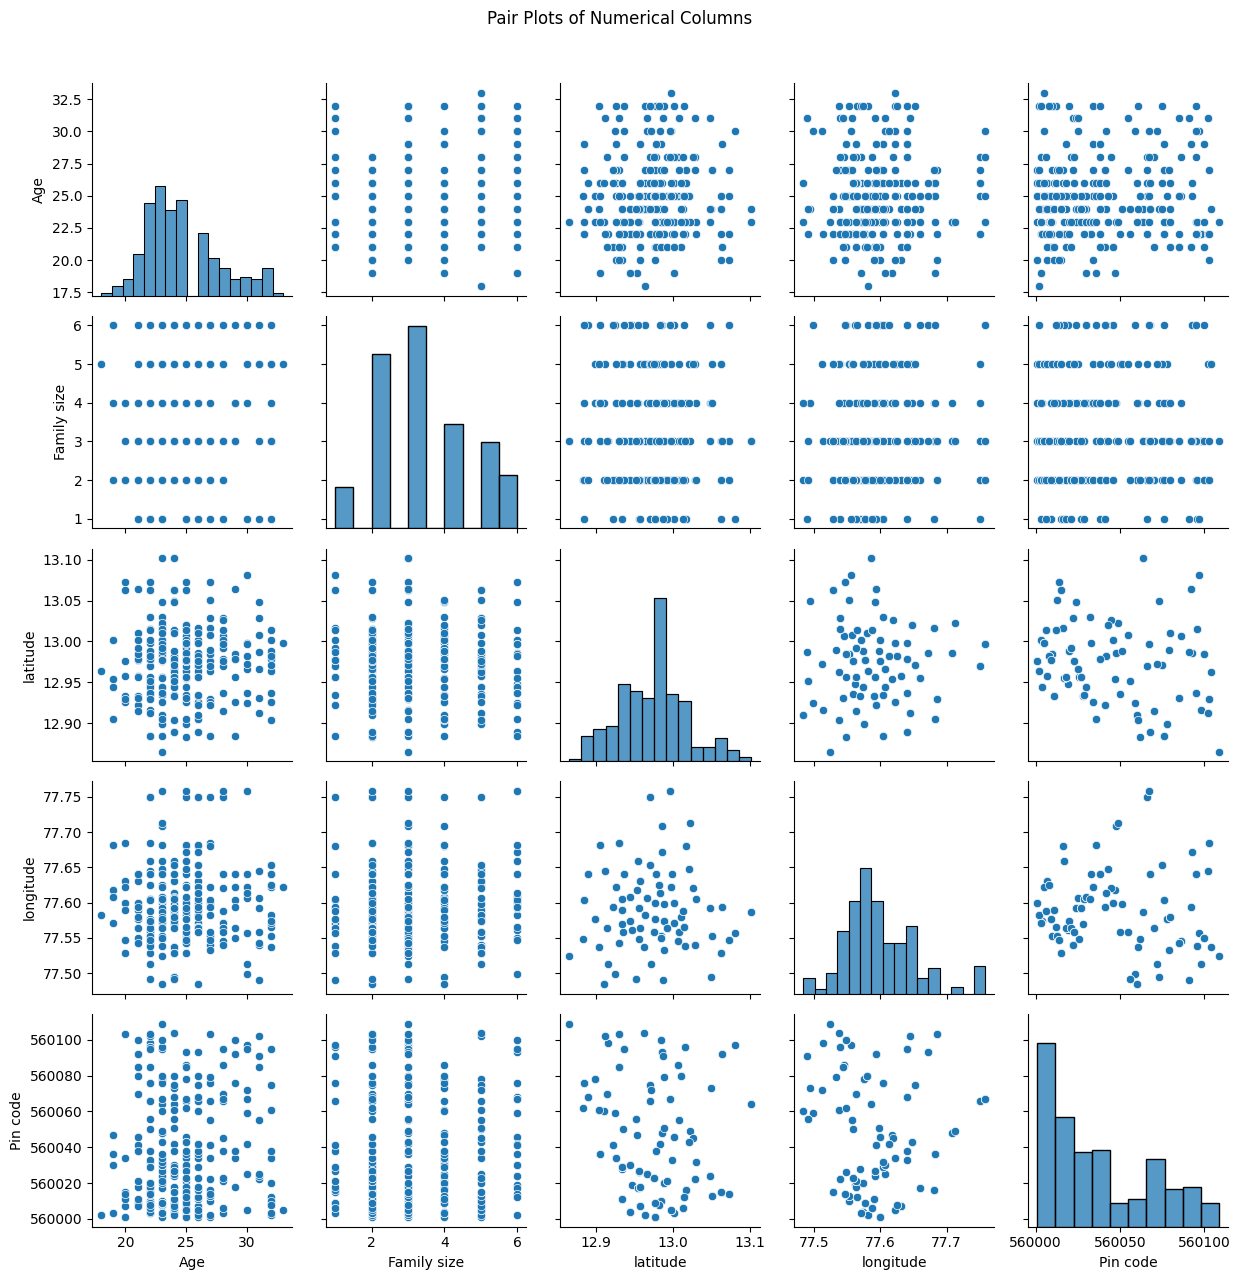

In [12]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [13]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Occupation']=label.fit_transform(df['Occupation'])
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,3,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,3,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,3,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,3,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,3,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,Male,Single,3,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
363,31,Male,Married,0,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
369,30,Male,Married,0,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
374,21,Male,Single,3,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes


In [14]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Gender,Marital Status,Monthly Income,Educational Qualifications,Output,Feedback,Unnamed: 12
0,Female,Single,No Income,Post Graduate,Yes,Positive,Yes
1,Female,Single,Below Rs.10000,Graduate,Yes,Positive,Yes
2,Male,Single,Below Rs.10000,Post Graduate,Yes,Negative,Yes
3,Female,Single,No Income,Graduate,Yes,Positive,Yes
4,Male,Single,Below Rs.10000,Post Graduate,Yes,Positive,Yes
...,...,...,...,...,...,...,...
355,Male,Single,No Income,Graduate,No,Positive,No
363,Male,Married,More than 50000,Ph.D,Yes,Positive,Yes
369,Male,Married,More than 50000,Post Graduate,Yes,Positive,Yes
374,Male,Single,No Income,Graduate,Yes,Negative,Yes


In [15]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Gender':
['Female' 'Male']

Unique values in 'Marital Status':
['Single' 'Married' 'Prefer not to say']

Unique values in 'Monthly Income':
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']

Unique values in 'Educational Qualifications':
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']

Unique values in 'Output':
['Yes' 'No']

Unique values in 'Feedback':
['Positive' 'Negative ']

Unique values in 'Unnamed: 12':
['Yes' 'No']



# One-Hot encoding

In [16]:
df1 = pd.get_dummies(df, columns=object_columns)

In [17]:
df1

,Age,Occupation,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,3,4,12.9766,77.5993,560001,True,False,False,False,...,False,True,False,False,False,True,False,True,False,True
1,24,3,3,12.9770,77.5773,560009,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
2,22,3,3,12.9551,77.6593,560017,False,True,False,False,...,False,True,False,False,False,True,True,False,False,True
3,22,3,6,12.9473,77.5616,560019,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,22,3,4,12.9850,77.5533,560010,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,3,2,13.0012,77.5995,560046,False,True,False,False,...,False,False,False,False,True,False,False,True,True,False
363,31,0,3,12.9306,77.5434,560085,False,True,True,False,...,True,False,False,False,False,True,False,True,False,True
369,30,0,6,12.9369,77.6407,560095,False,True,True,False,...,False,True,False,False,False,True,False,True,False,True
374,21,3,3,13.0641,77.5931,560092,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True


In [18]:
df1.shape

(285, 27)

In [19]:
y=df1['Occupation']
y

0      3
1      3
2      3
3      3
4      3
      ..
355    3
363    0
369    0
374    3
386    3
Name: Occupation, Length: 285, dtype: int64

In [20]:
X = df1.drop(['Occupation'],axis=1)
X

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,True,False,False,False,True,...,False,True,False,False,False,True,False,True,False,True
1,24,3,12.9770,77.5773,560009,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True
2,22,3,12.9551,77.6593,560017,False,True,False,False,True,...,False,True,False,False,False,True,True,False,False,True
3,22,6,12.9473,77.5616,560019,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True
4,22,4,12.9850,77.5533,560010,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,2,13.0012,77.5995,560046,False,True,False,False,True,...,False,False,False,False,True,False,False,True,True,False
363,31,3,12.9306,77.5434,560085,False,True,True,False,False,...,True,False,False,False,False,True,False,True,False,True
369,30,6,12.9369,77.6407,560095,False,True,True,False,False,...,False,True,False,False,False,True,False,True,False,True
374,21,3,13.0641,77.5931,560092,False,True,False,False,True,...,False,False,False,False,False,True,True,False,False,True


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature selection
</div>

In [21]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

def mutual_information(df1, target, threshold=0.1):
    X = df1.drop(columns=[target])
    y = df1[target]
    mi = mutual_info_classif(X, y)
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    
    # Filter features with mutual information score greater than the threshold
    filtered_mi_series = mi_series[mi_series > threshold]
    
    return filtered_mi_series.index.tolist(), filtered_mi_series
target = 'Occupation'
top_features_mi, mi_series = mutual_information(df1, target)
print("Top features based on mutual information:", top_features_mi)


Top features based on mutual information: ['Monthly Income_No Income', 'Age', 'Marital Status_Single', 'Marital Status_Married', 'Monthly Income_More than 50000', 'Monthly Income_25001 to 50000']


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [22]:
TopF=['Monthly Income_No Income', 'Age', 'Marital Status_Single', 'Marital Status_Married', 'Monthly Income_25001 to 50000', 'Pin code', 'longitude', 'latitude', 'Monthly Income_More than 50000', 'Unnamed: 12_Yes']
x=df1[TopF]

In [23]:
def remove_redundant_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced, to_drop
threshold = 0.9 
x, dropped_features = remove_redundant_features(x, threshold)

print("Dropped Features:", dropped_features)
print("Reduced DataFrame shape:", x.shape)


Dropped Features: ['Marital Status_Married']
Reduced DataFrame shape: (285, 9)


In [24]:
x

,Monthly Income_No Income,Age,Marital Status_Single,Monthly Income_25001 to 50000,Pin code,longitude,latitude,Monthly Income_More than 50000,Unnamed: 12_Yes
0,True,20,True,False,560001,77.5993,12.9766,False,True
1,False,24,True,False,560009,77.5773,12.9770,False,True
2,False,22,True,False,560017,77.6593,12.9551,False,True
3,True,22,True,False,560019,77.5616,12.9473,False,True
4,False,22,True,False,560010,77.5533,12.9850,False,True
...,...,...,...,...,...,...,...,...,...
355,True,21,True,False,560046,77.5995,13.0012,False,False
363,False,31,False,False,560085,77.5434,12.9306,True,True
369,False,30,False,False,560095,77.6407,12.9369,True,True
374,True,21,True,False,560092,77.5931,13.0641,False,True


In [25]:
x.columns

Index(['Monthly Income_No Income', 'Age', 'Marital Status_Single',
       'Monthly Income_25001 to 50000', 'Pin code', 'longitude', 'latitude',
       'Monthly Income_More than 50000', 'Unnamed: 12_Yes'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler
# non_boolean_numerical_features = ['Year', 'Driven_kms']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [27]:
X

array([[0.13333333, 0.6       , 0.47043919, ..., 1.        , 0.        ,
        1.        ],
       [0.4       , 0.4       , 0.47212838, ..., 1.        , 0.        ,
        1.        ],
       [0.26666667, 0.4       , 0.37964527, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8       , 1.        , 0.30278716, ..., 1.        , 0.        ,
        1.        ],
       [0.2       , 0.4       , 0.83994932, ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.2       , 0.47212838, ..., 1.        , 0.        ,
        1.        ]])

In [28]:
y

0      3
1      3
2      3
3      3
4      3
      ..
355    3
363    0
369    0
374    3
386    3
Name: Occupation, Length: 285, dtype: int64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
X_train

,Monthly Income_No Income,Age,Marital Status_Single,Monthly Income_25001 to 50000,Pin code,longitude,latitude,Monthly Income_More than 50000,Unnamed: 12_Yes
293,False,25,False,False,560009,77.5773,12.9770,True,False
25,True,25,True,False,560008,77.6256,12.9820,False,True
99,True,32,False,False,560012,77.5658,13.0140,False,False
166,True,27,True,False,560013,77.5529,13.0503,False,False
159,True,20,True,False,560011,77.5900,12.9337,False,True
...,...,...,...,...,...,...,...,...,...
211,False,25,True,False,560043,77.6479,13.0206,False,True
78,True,22,True,False,560009,77.5773,12.9770,False,True
122,False,26,True,True,560002,77.5821,12.9635,False,True
294,False,25,False,True,560005,77.6227,12.9980,False,False


In [31]:
y_train

293    0
25     3
99     1
166    3
159    3
      ..
211    2
78     3
122    2
294    0
118    0
Name: Occupation, Length: 228, dtype: int64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;">Naive Bayes classifier
 </h1>
</div>


In [32]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

def evaluate_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    train_confusion = confusion_matrix(y_train, y_pred_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_confusion = confusion_matrix(y_test, y_pred_test)
    
    return {
        'train_accuracy': train_accuracy,
        'train_precision': train_precision,
        'train_recall': train_recall,
        'train_f1': train_f1,
        'train_confusion': train_confusion,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'test_confusion': test_confusion
    }

# Assuming X_train, y_train, X_test, and y_test are already defined
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB()
}

results = {}

for name, clf in classifiers.items():
    results[name] = evaluate_model(clf, X_train, y_train, X_test, y_test)

for name, metrics in results.items():
    print(f"\n{name}")
    print(f"Training Accuracy: {metrics['train_accuracy']}")
    print(f"Training Precision: {metrics['train_precision']}")
    print(f"Training Recall: {metrics['train_recall']}")
    print(f"Training F1 Score: {metrics['train_f1']}")
    print("Training Confusion Matrix:")
    print(metrics['train_confusion'])
    print(f"\nTesting Accuracy: {metrics['test_accuracy']}")
    print(f"Testing Precision: {metrics['test_precision']}")
    print(f"Testing Recall: {metrics['test_recall']}")
    print(f"Testing F1 Score: {metrics['test_f1']}")
    print("Testing Confusion Matrix:")
    print(metrics['test_confusion'])



MultinomialNB
Training Accuracy: 0.7587719298245614
Training Precision: 0.6379839266892667
Training Recall: 0.7587719298245614
Training F1 Score: 0.6929606416807202
Training Confusion Matrix:
[[ 60   0   0  13]
 [  0   0   0   8]
 [ 26   0   0   3]
 [  5   0   0 113]]

Testing Accuracy: 0.7017543859649122
Testing Precision: 0.5756719163637994
Testing Recall: 0.7017543859649122
Testing F1 Score: 0.6313131313131313
Testing Confusion Matrix:
[[15  0  0  6]
 [ 0  0  0  1]
 [ 7  0  0  2]
 [ 1  0  0 25]]

GaussianNB
Training Accuracy: 0.7982456140350878
Training Precision: 0.8197931207948185
Training Recall: 0.7982456140350878
Training F1 Score: 0.8022328320685752
Training Confusion Matrix:
[[ 61   0  12   0]
 [  0   8   0   0]
 [ 17   0  12   0]
 [ 15   1   1 101]]

Testing Accuracy: 0.7017543859649122
Testing Precision: 0.6880382775119618
Testing Recall: 0.7017543859649122
Testing F1 Score: 0.6817411174996314
Testing Confusion Matrix:
[[18  0  3  0]
 [ 0  0  0  1]
 [ 8  0  1  0]
 [ 4  0  

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

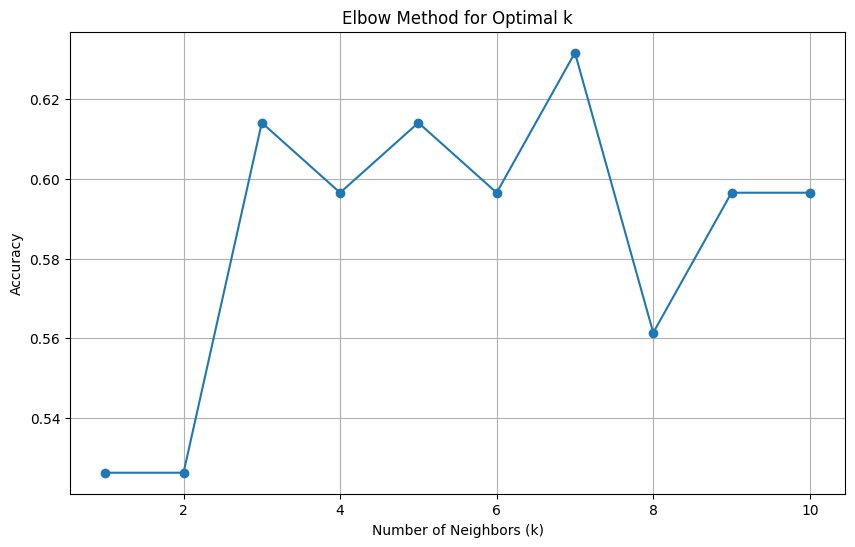

In [33]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [34]:
# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [35]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [36]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.8026315789473685
Training Precision: 0.7963813928191336
Training Recall: 0.8026315789473685
Training F1 Score: 0.7967815991023145
Training Confusion Matrix:
[[ 57   0   5  11]
 [  1   5   2   0]
 [ 11   1  13   4]
 [  9   0   1 108]]

Testing Accuracy: 0.6140350877192983
Testing Precision: 0.5673103036228341
Testing Recall: 0.6140350877192983
Testing F1 Score: 0.5798470535312642
Testing Confusion Matrix:
[[12  0  2  7]
 [ 0  0  0  1]
 [ 4  0  1  4]
 [ 3  0  1 22]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTree </h1>
</div>

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_estimator_



Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [38]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeClassifier(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5)

In [39]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [40]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

Training Accuracy: 0.9078947368421053
Training Precision: 0.9123287731646864
Training Recall: 0.9078947368421053
Training F1 Score: 0.9034617583549501
Training Confusion Matrix:
[[ 69   0   1   3]
 [  0   8   0   0]
 [ 13   0  16   0]
 [  3   0   1 114]]


In [41]:
print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


Testing Accuracy: 0.7017543859649122
Testing Precision: 0.6493490097056736
Testing Recall: 0.7017543859649122
Testing F1 Score: 0.6718386876281612
Testing Confusion Matrix:
[[15  0  3  3]
 [ 0  0  0  1]
 [ 7  0  1  1]
 [ 1  0  1 24]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForest </h1>
</div>

In [42]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_




Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [43]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestClassifier(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [44]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)


Training Accuracy: 0.9078947368421053
Training Precision: 0.9123287731646864
Training Recall: 0.9078947368421053
Training F1 Score: 0.9034617583549501
Training Confusion Matrix:
[[ 69   0   1   3]
 [  0   8   0   0]
 [ 13   0  16   0]
 [  3   0   1 114]]


In [45]:

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


Testing Accuracy: 0.7017543859649122
Testing Precision: 0.6493490097056736
Testing Recall: 0.7017543859649122
Testing F1 Score: 0.6718386876281612
Testing Confusion Matrix:
[[15  0  3  3]
 [ 0  0  0  1]
 [ 7  0  1  1]
 [ 1  0  1 24]]


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [46]:
models = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,MultinomialNB,0.758772,0.701754,0.575672,0.701754,0.631313
1,GaussianNB,0.798246,0.701754,0.688038,0.701754,0.681741
2,BernoulliNB,0.776316,0.719298,0.592149,0.719298,0.649517
3,ComplementNB,0.758772,0.719298,0.591175,0.719298,0.648548
4,Random Forest,1.000000,0.754386,0.698670,0.754386,0.713969
5,Decision Tree,1.000000,0.684211,0.645246,0.684211,0.659856
6,K-Nearest Neighbors,0.780702,0.614035,0.595200,0.614035,0.587886


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Best Performing Model: Random Forest stands out as the best performing model with the highest test accuracy and F1 score , indicating it generalizes well and maintains a balance between precision and recall.
Overfitting Concern: Both Random Forest and Decision Tree exhibit perfect training accuracy, suggesting potential overfitting, but Random Forest manages to maintain strong performance on the test set.
Alternative Models: GaussianNB and BernoulliNB offer reasonable alternatives with balanced performance metrics, although they do not outperform Random Forest.</h1>
</div>